<a href="https://colab.research.google.com/github/barkamoljon/data_science_praktikum/blob/main/Practice_for_the_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

### 1-QADAM. FAOLIYATNI O'RGANISH

Keling boshlanishiga loyiha haqida tasavvur hosil qilaylik.

Bizning amaliyotimiz Toshkent shahridago uylarni aniqlashimiz kerak. 

Sizga berilgan ma'lumot: uybor.uz saytidan olingan ma`lumotlar.


**Demak bizning vazifamiz yuqorida ma'lumotlarga asoslangan holda turli hududlarda uylarning narxini aniqlab beruvchi model (dastur) tuzish**

#### 1.1 Jarayonlarni tushunish

Aslida bizning birinchi qiladigan ishimiz, loyiha haqida ko'proq ma'lumot to'plash.Hozir bizga buni hojati yo'q.Sababi bizda ma`lumotlar yetarli. 

###Tozalash

### 2.1 Ma'lumotlarni ko'ramiz qilamiz###

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


Yuqoridagi natijadan olingan xulosalar:
1. Dataset 7655 qatordan iborat.
2. Barcha ustunllar to`liq.
3. `size` va `price` asli raqamli ustun. Shuning uchun ularni sonli ustunlarga o`tkazib olamiz.
4. `district`, `location`  matnli ustunlar. 

In [ ]:
# 'Площадьземли:1сот' ni qayerdaligini aniqlab uni tashlab yuboramiz
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


In [ ]:
# Tashlab yuboramiz
df.drop(5347, inplace=True)

In [ ]:
#size ustunini intga  aylantirib olamiz
df['size'] = df['size'].to_numpy().astype(float)
df['size'] = df['size'].to_numpy().astype(int)

In [ ]:
#price sonli ustunga o`tkazib olamiz
#df['price'] = df['price'].to_numpy().astype(float)

In [ ]:
# O`tkazib bo`lmadi sababi 'Договорная' ustuni uzunligini bilib olamiz.
len(df[df['price']=='Договорная'])

99

In [ ]:
# 'Договорная' ni tashlab yuboramiz.  
df.drop(df[df['price']=='Договорная'].index, inplace=True)

In [ ]:
# Yuqoridagi ishni `price` ustunida ham qilamz
df['price'] = df['price'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7465 non-null   object
 1   district    7465 non-null   object
 2   rooms       7465 non-null   int64 
 3   size        7465 non-null   int64 
 4   level       7465 non-null   int64 
 5   max_levels  7465 non-null   int64 
 6   price       7465 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 466.6+ KB


In [ ]:
# noodatiy qiymatlarni tashlab yuboramiz
df.drop(df[df['price'] > 299000].index, inplace=True)
df.drop(df[df['price'] < 10000].index, inplace=True)
df.drop(df[df['size'] > 250].index, inplace=True)
df.drop(df[df['size'] < 15].index, inplace=True)
df.drop(df[(df['size']<20) & (df['rooms']!=1)].index, inplace=True)
df.drop(df[(df['size']<30) & (df['rooms']>2)].index, inplace=True)

In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7346.000000,7346.000000,7346.000000,7346.000000,7346.000000
mean,2.595018,71.230193,3.702151,6.020011,56400.585353
std,1.037761,30.644615,2.235316,2.600363,35932.061114
min,1.000000,15.000000,1.000000,1.000000,10000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,2.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,84.000000,5.000000,9.000000,65000.000000
max,8.000000,250.000000,19.000000,25.000000,299000.000000


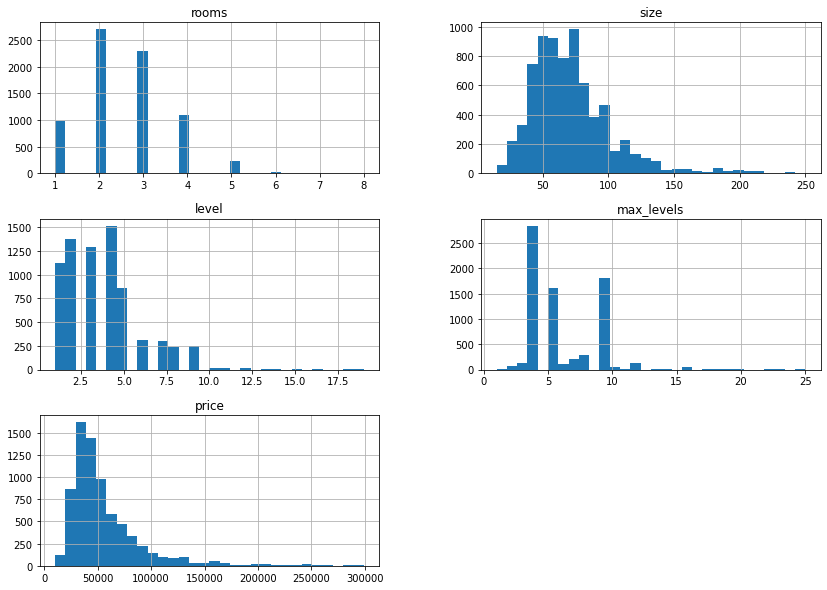

In [ ]:
%matplotlib inline
df.hist(bins=30, figsize=(14,10))
plt.show()

### 2.2 Trains va Test set.
Esingizda bo'lsa avvalgi modulda ML uchun ma'lumotlarni ikki (aniqro'gi uch) qismga ajratib olishni gaplashgan edik: 
- Train set - model yaratish uchun
- Test set - model aniqligini tekshirish uchun

Aslida, ma'lumotlarni tahlil qilish bosqichida bunga hali ertadek tuyulishi mumkin, lekin bu yerda maqsad nafaqat komyuterni balki bizning ham xato xulosa qilishimizni oldini olish.

Avval tasviya qilganimizdek ma'lumotlarnining 80\% train, 20\% test uchun ajratamiz. Buning uchun `scikit-learn` tarkibida tayyor `train_test_split` funskyasiga murojaat qilamiz.

Funskiyaga parametr sifatida dataset (`df`), test set hajmi (0.2 ya'ni 20%) va tasodifiy sonlar generatori uchun qiymat (`random_seed`) beramiz.

**`random_seed`** ning vazifasi `train_test_split` funksiyani ishga tushirganda doim bir hil tasodifiy qiymatlar olish. Bu esa, ML model yaratish jarayonida `test_set` doim yashirin qolishini ta'minlaydi.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df, test_size=0.2, random_state=54)

In [ ]:
train_set

,location,district,rooms,size,level,max_levels,price
5042,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,58,3,5,40000
5761,"город Ташкент, Чиланзарский район, Аль-Хорезми-2",Чиланзарский,2,60,4,4,33500
5097,"город Ташкент, Яккасарайский район, Малая коль...",Яккасарайский,3,83,2,4,77000
5181,"город Ташкент, Шайхантахурский район, Самаркан...",Шайхантахурский,4,110,12,12,68000
1422,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,2,70,4,5,103000
...,...,...,...,...,...,...,...
3923,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,68,3,4,68000
5297,"город Ташкент, Чиланзарский район, Чиланзар 16...",Чиланзарский,3,65,3,4,62000
3969,"город Ташкент, Шайхантахурский район, Лабзак",Шайхантахурский,3,80,2,4,72000
925,"город Ташкент, Учтепинский район, Гулистон",Учтепинский,2,50,4,4,37500


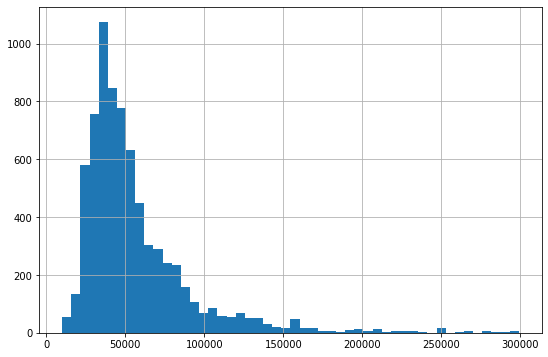

In [ ]:
%matplotlib inline
df['price'].hist(bins=50, figsize=(9,6))
plt.show()

`StratifiedShuffleSplit`dan foydalanishdan avval `median_income` ustunidagi qiymatlarni bir nechta kategoriyalarga ajratib olishimiz kerak. Aynan shu kategoriyalar `StratifiedShuffleSplit` ichidagi split funksiyasiga uzatiladi va funksiya shu kategoriya asosida train va test set o'rtasidagi balansni saqlaydi.

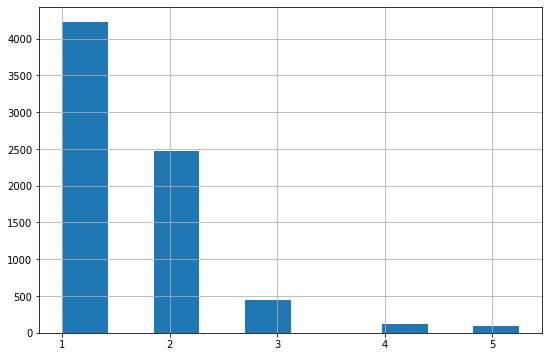

In [ ]:
df['price_cat'] = pd.cut(df['price'], bins=[ 0,50000, 100000,150000,200000,250000,300000,350000, np.inf], labels=[1,2,3,4,5,5.25,6,7])
df['price_cat'].hist(figsize=(9,6))
plt.show()

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit (n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df, df['price_cat']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [ ]:
strat_train_set.drop('price_cat', axis=1, inplace=True)
strat_test_set.drop('price_cat', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 2.3 Ma'lumotlarni tahlil qilamiz.

Keling endi bevosita ma'lumotlarni tahlil qilishga o'taylik. Esingizda bo'lsa biz endi `train` set bilan ishlashimiz kerak. Bizda hozircha 2 ta alohida train set bo'lib qoldi:
- `train_set` - `train_test_split` yordamida bo'lingan (muvozanatsiz)
- `strat_train_set` - `StratifiedShuffleSplit` yordamida bo'lingan.

Biz ikkinchi setdan foydalanamiz. Qulaylik uchun bu setimizda nusxa ko'chirib olamiz.

In [ ]:
housing = strat_train_set.copy()

### Vizualizatsiya

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

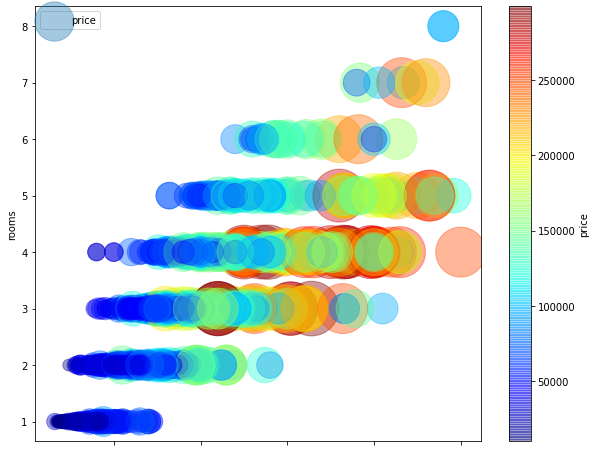

In [ ]:
housing.plot(
kind='scatter',
x='size',
y='rooms',
alpha=0.4,
s=housing['price']/100,# nuqta radiusi aholi soniga qarab o'zgaradi
label='price',
c= 'price', # nuqta rangi uyning narxiga qarab o'zgaradi
cmap='jet', # ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
colorbar=True,
figsize=(10,8)
)
plt.show()

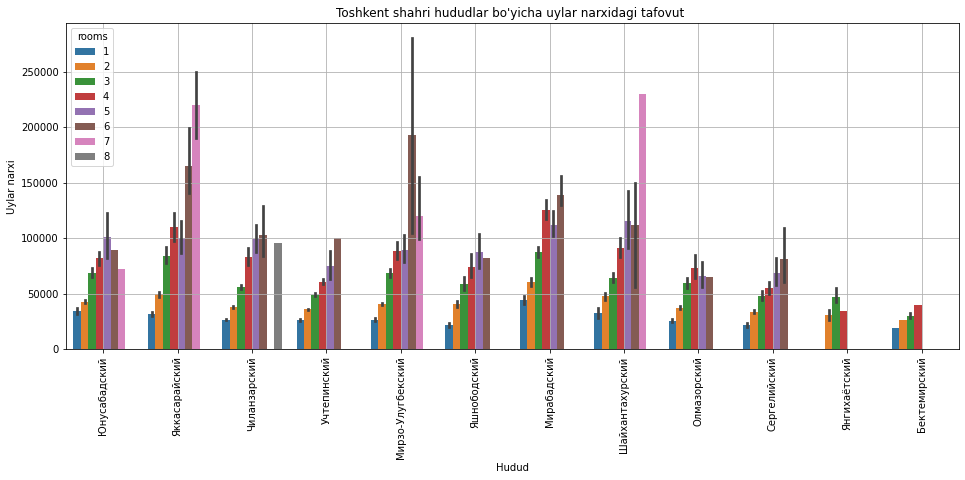

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.district, y=df['price'], hue=df['rooms'])

plt.title("Toshkent shahri hududlar bo'yicha uylar narxidagi tafovut ")
plt.xlabel('Hudud')
plt.ylabel('Uylar narxi')
plt.xticks(rotation=90)
plt.grid()
plt.show()

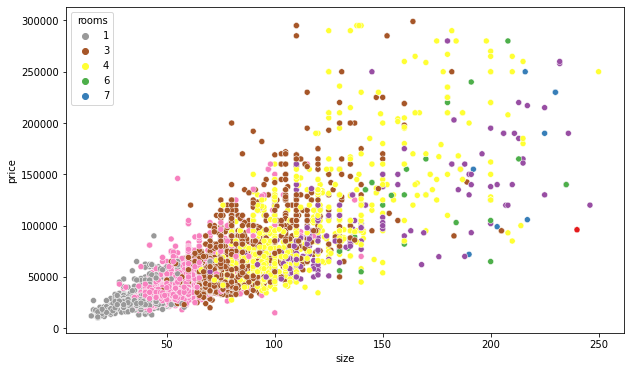

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['size'], y=df['price'], hue='rooms', palette='Set1_r')
plt.show()

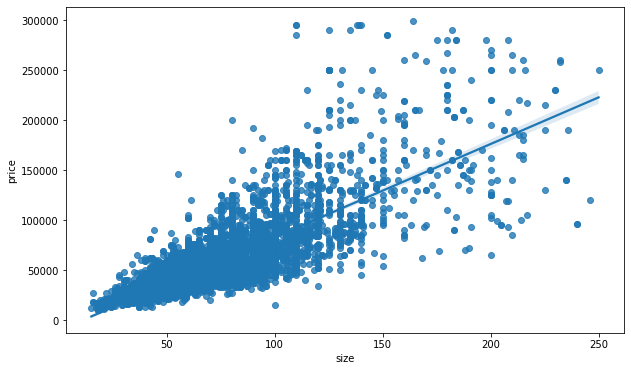

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(y=df['price'], x=df['size'])
plt.show()

### Korrelyasiya

In [ ]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price         1.000000
size          0.795867
rooms         0.566695
max_levels    0.250165
level         0.085584
dtype: float64

Ko'rishimiz mumkinki, `price` va `size`, `rooms`, `max_level` ustunlari orasida korrelyatsiya nisbatan kuchli.

`seaborn` tarkibidagi `pairplot` funksiyasi yordamida korrelyasiya qiymatlarini grafik ko'rinishida chiqarishimiz ham mumkin.



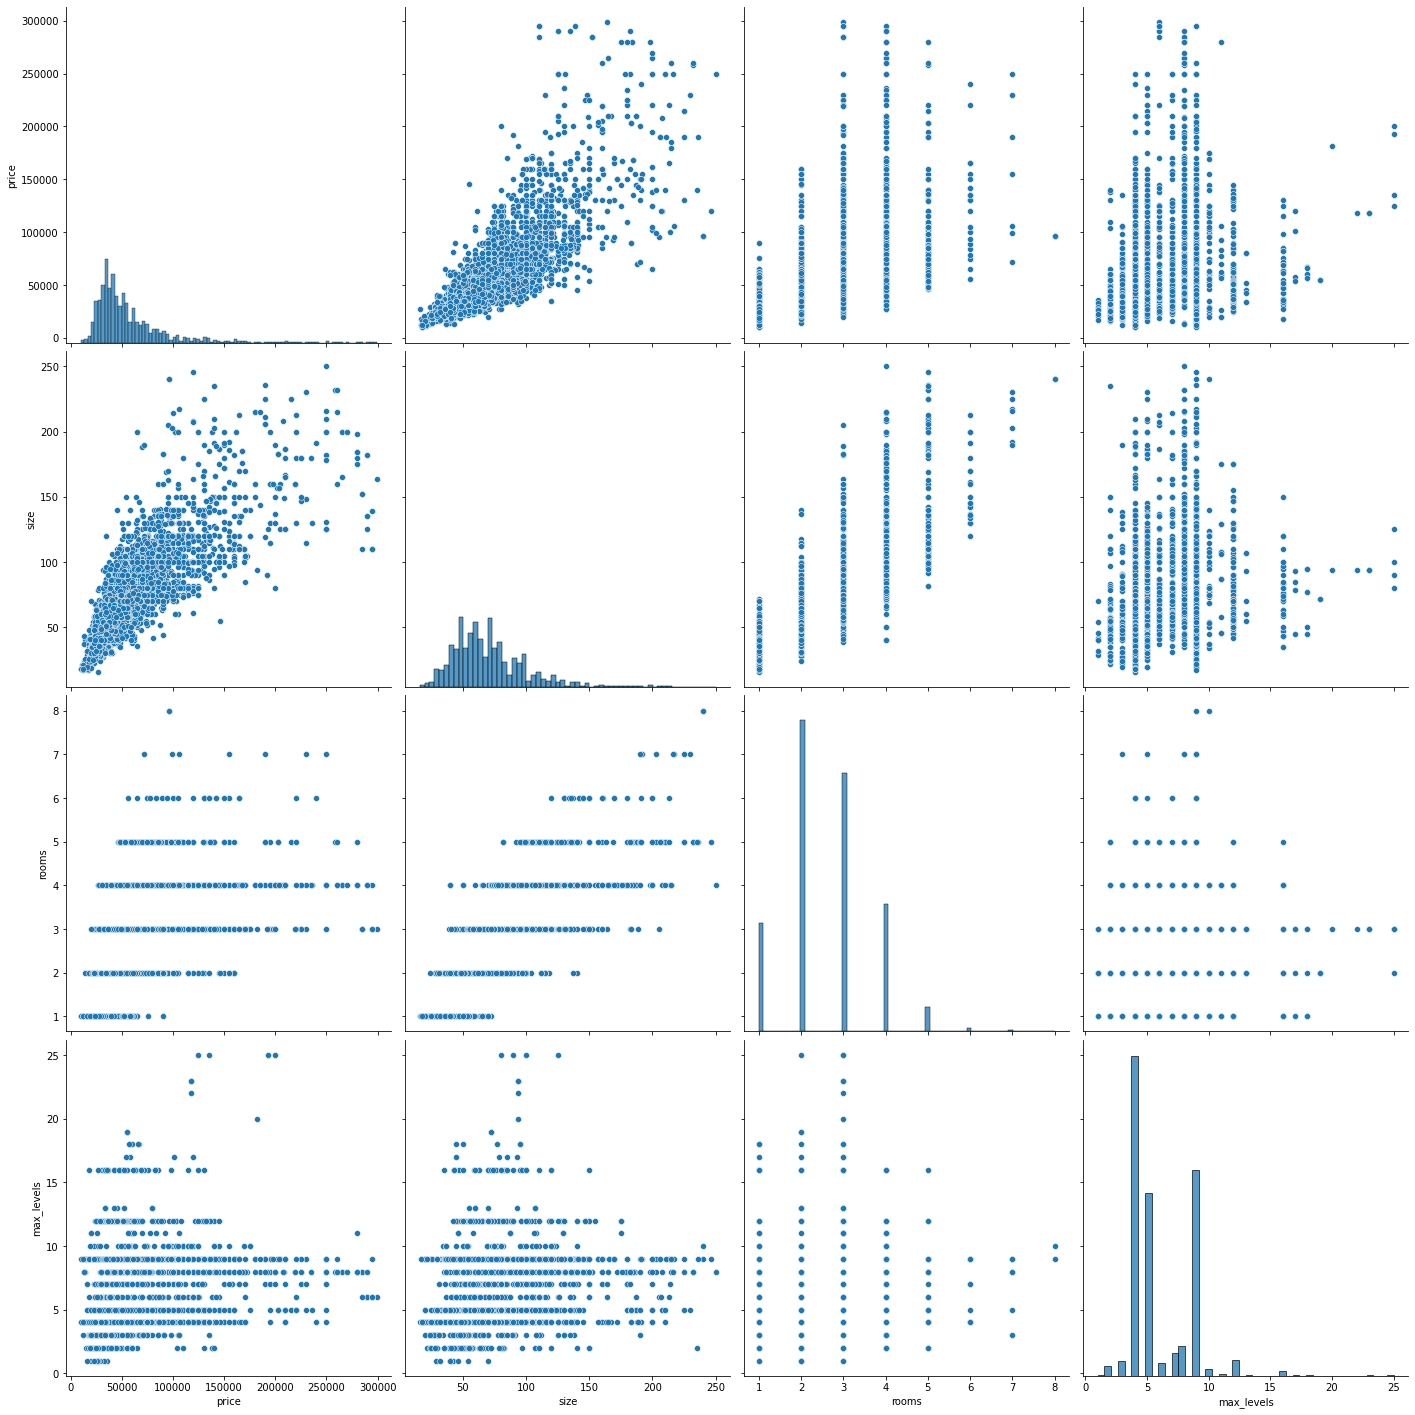

In [ ]:
cols = ['price' , 'size' , 'rooms', 'max_levels']
sns.pairplot(housing[cols], height=5)
plt.show()

Barcha ustunlar orasida price va size o'rtasida korrelyatsiya eng kuchli ekan, keling uni alohida chizaylik.

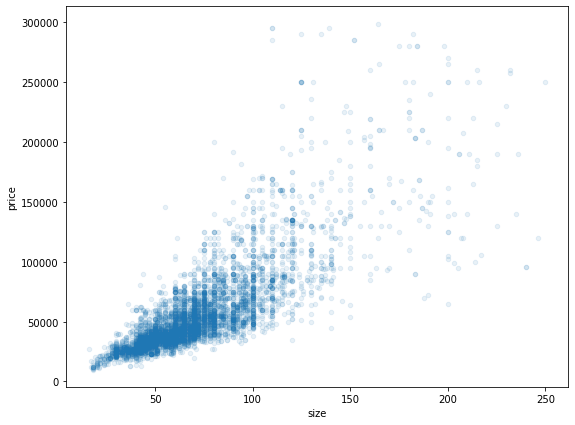

In [ ]:
housing.plot(kind='scatter', x='size', y='price', alpha=0.1, figsize=(9,7))
plt.show()

Grafikda kuchli korrelyasiya borligini ko'rishimiz mumkin. Ya'ni hudud bo'yicha aholining daromadi oshgani sari, hududdagi narxlar ham oshgan. 

## 3-QADAM. Ma'lumotlarni Machine Learning uchun tayyorlash
Keyingi katta qadam ma'lumotlarni ML uchun tayyorlash. Avvalgi qadamlarda biz ma'lumotlarga to'g'ridan-to'g'ri ishlov berib, ularni tahlil qildik. O'zimiz uchun ba'zi kerakli xulosalarni oldik.
Umuman olganda, ma'lumotlarg bo'lgan talabni shakllantridik. Navbat shu talablar asosida ma'lumotlarni tayyorlash.

Buning uchun endi biz ma'lumotlar bilan to'g'ridan-to'g'ri emas, funksiyalar orqali ishlaymiz. Ya'ni, avvalgi qismda bajargan barcha jarayonlarnbi funksiyalar yordamida avtomatlashtiramiz. 
Bunday qilishimizdan maqsad esa, kelajakda yangi ma'lumotlarga ishlov berishda tayyor funksiyani ishga tushirish orqali ma'lumotlarni bittada bizga kerak ko'rinishga keltirib olamiz.

In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
print(df.head())
df.drop(5347, inplace=True)
df['size'] = df['size'].astype(float)
df['size'] = df['size'].astype(int)
df.drop(df[df['price']=='Договорная'].index, inplace=True)
df.price = df['price'].astype(int)
df.drop(df[df['size']>200].index, inplace=True)
df.drop(df[df['size']<15].index, inplace=True)
df.drop(df[df['price']<10000].index, inplace=True)
df.drop(df[df['price']>299999].index, inplace=True)
df.drop(df[(df['size']<20) & (df['rooms']!=1)].index, inplace=True)
df.drop(df[(df['size']<30) & (df['rooms']>2)].index, inplace=True)


                                            location       district  rooms  \
0  город Ташкент, Юнусабадский район, Юнусабад 8-...   Юнусабадский      3   
1  город Ташкент, Яккасарайский район, 1-й тупик ...  Яккасарайский      2   
2  город Ташкент, Чиланзарский район, Чиланзар 2-...   Чиланзарский      2   
3  город Ташкент, Чиланзарский район, Чиланзар 9-...   Чиланзарский      3   
4  город Ташкент, Чиланзарский район, площадь Актепа   Чиланзарский      3   

  size  level  max_levels  price  
0   57      4           4  52000  
1   52      4           5  56000  
2   42      4           4  37000  
3   65      1           4  49500  
4   70      3           5  55000  


# **train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.25 , random_state = 54)

X_train =train_set.drop('price', axis=1)
y=train_set['price'].copy()

X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

X_num =X_train.drop(columns=['district','location'], axis=1)

# **Pipeline**

###Sonli ustunlar uchun

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())     
])


###Matnli ustunlar uchun va to`liq

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

num_attribs = list(X_num)
loc_cat_attribs = ['location']
dis_cat_attribs = ['district']

full_pipeline = ColumnTransformer([
   ('num', num_pipeline, num_attribs),
   ('loc', OrdinalEncoder(), loc_cat_attribs),
   ('dis', OneHotEncoder(), dis_cat_attribs)                              
])

In [ ]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[ 0.40377501,  0.65745368,  0.58069125, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.40377501,  1.343623  ,  1.47123622, ...,  0.        ,
         0.        ,  0.        ],
       [-1.55104558, -1.2981289 ,  0.58069125, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.55104558, -1.12658657, -1.20039871, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57363529, -0.85211884, -0.75512622, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40377501,  0.38298595, -0.75512622, ...,  0.        ,
         0.        ,  1.        ]])

# **Machine Learning**

## **LinearRegression**

---

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(X_prepared, y)

LinearRegression()

In [ ]:
# Preparing & Predict
X_test_prepared = full_pipeline.fit_transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
pd.DataFrame({'Prognoz':y_test, 'Asl narxi':y_predicted})

,Prognoz,Asl narxi
7137,42000,43297.736257
5940,53500,55311.222368
2546,89000,87119.055673
2317,51000,35341.759490
5714,29500,23835.545839
...,...,...
1544,118500,93276.520499
4558,40000,30536.710899
299,26000,17519.208652
1096,104900,63759.226883


### Modelni baholash
`LR_model`

---


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [ ]:
print('MAE LR_model =', mae(y_test, y_predicted))
print('RMSE LR_model =', np.sqrt(mse(y_test, y_predicted)))

MAE LR_model = 12557.208223256794
RMSE LR_model = 18438.522612886645


# **DecisionTree**

---

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()


In [ ]:
#Model Training
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [ ]:
#Predict
y_predicted = Tree_model.predict(X_test_prepared) 

In [ ]:
pd.DataFrame({"Prognoz": y_test, "Asl_narxi":y_predicted})

,Prognoz,Asl_narxi
7137,42000,64000.000000
5940,53500,78000.000000
2546,89000,170000.000000
2317,51000,32500.000000
5714,29500,48000.000000
...,...,...
1544,118500,70500.000000
4558,40000,31000.000000
299,26000,22500.000000
1096,104900,107666.666667


### Modelni baholash
`Tree_model`

---

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [ ]:
print('MAE Tree_model =', mae(y_test, y_predicted))
print('RMSE Tree_model =', np.sqrt(mse(y_test, y_predicted)))

MAE Tree_model = 16408.78002920774
RMSE Tree_model = 26470.107316175825


## **RandomForest**

---

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

In [ ]:
# Model training
RF_model.fit(X_prepared, y)


RandomForestRegressor()

In [ ]:
#Pedict
y_predicted = RF_model.predict(X_test_prepared)

In [ ]:
pd.DataFrame({"Prognoz": y_test, "Asl_narxi":y_predicted})

,Prognoz,Asl_narxi
7137,42000,56047.178571
5940,53500,67274.740000
2546,89000,98377.040000
2317,51000,46385.047619
5714,29500,36223.566667
...,...,...
1544,118500,89702.320000
4558,40000,36066.571429
299,26000,27420.800000
1096,104900,81275.333333


### Modelni baholash
`RF_model`

---

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [ ]:
print('MAE RF_model =', mae(y_test, y_predicted))
print('RMSE RF_model =', np.sqrt(mse(y_test, y_predicted)))

MAE RF_model = 12139.586060574726
RMSE RF_model = 19012.134244381705


# **Cross-Validation usuli bilan baholash**

Yuqorida biz modelni baholash uchun ma'lumotlarni test va train setlarga ajratdik. 
Bu usulning kamchiligi biz test va train uchun doim bir xil ma'lumotlardan foydalanayapmiz. 

Cross-validation yordamida biz ma'lumotlarni bir necha qismga ajratib, modelni turli qismlar yordamida bir nechta bor train va test qilishimiz mumkin. 

Misol uchun, quyidagi rasmda ma'lumotlarni 5 ga ajratib train va test qilish ko'rsatilgan.

![](https://www.oreilly.com/library/view/machine-learning-quick/9781788830577/assets/b90b29ab-dfe7-4c11-9a2f-321e84f79495.png)

# **Cross-Validation**

Cross validation uchun ma'lumotlarni train va testga bo'lish shart emas, buni sklearn o'zi qiladi.

In [ ]:
from sklearn.model_selection import cross_val_score
X = df.drop("price", axis=1)
y = df['price'].copy()
 
X_prepared = full_pipeline.fit_transform(X)

Validation natijalarini ko'rsatish uchun sodda funksiya yasab olamiz

In [ ]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Srd.dev:', scores.std())

## **LinearRegression**



In [ ]:
scores = cross_val_score(LR_model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [15447.45381931 17088.52775264 22035.63091665 23320.58681217
 23292.62705711 23199.0117445  19492.0423855  17620.86310569
 18028.14650556 16186.69451818]
Mean: 19571.158461731236
Srd.dev: 2965.7423018667064


# **Decision Tree**

In [ ]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [20939.14735447 25066.60243214 26848.09087115 22481.99178106
 23832.92603847 22447.5386151  21221.14588957 19316.4741731
 23457.27663481 15595.72177362]
Mean: 22120.69155634951
Srd.dev: 2977.01803019945


## **RandomForest**

In [ ]:
scores = cross_val_score(RF_model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [12216.10872408 15819.97812231 19837.44975744 20313.61391396
 18690.30164927 17141.95598439 16552.02958125 14925.97292304
 16284.87255246 12731.41083583]
Mean: 16451.36940440202
Srd.dev: 2577.0344984491467


#**Joblib** orqali saqlash

In [ ]:
import joblib 
filename = 'LR_model.jbl'
joblib.dump(LR_model, filename)

['LR_model.jbl']

In [ ]:
import joblib 
filename = 'RF_model.jbl'
joblib.dump(RF_model, filename)

['RF_model.jbl']